# Labeled Faces in the Wild - Face Dataset
By Vipin Chandran Muthirikkaparambil
Student Number: 400547437

LFW (Labeled faces in the wild) face database is compiled by the Computer Vision Laboratory of University of Massachusetts at Amherst in the United States. It is mainly used to study face recognition problems under unrestricted conditions. The data set contains 13233 images of faces collected from the web. 1680 of the people have two or more distinct photos in the data set. From the database.

# 1. Face Dataset Compression (Dimensionality Reduction) & Reconstruction         using Principal Component Analysis (PCA)

In [1]:
#Importing the required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
#Takes time
#Getting file names and Image matrices
filenames_uncrop = []
images_uncrop = []

for file_uncrop in os.listdir('C:/Users/mvipi/Desktop/Multivariate Project/Labelled_Faces_Wild/lfw-deepfunneled/lfw-deepfunneled'):
    folder_path = os.path.join('C:/Users/mvipi/Desktop/Multivariate Project/Labelled_Faces_Wild/lfw-deepfunneled/lfw-deepfunneled/', file_uncrop)
    for i in os.listdir(folder_path):
        filenames_uncrop.append(i)
        image_uncrop = np.array(Image.open(os.path.join(folder_path, i)))
        images_uncrop.append(image_uncrop)

In [3]:
filenames_uncrop

['Aaron_Eckhart_0001.jpg',
 'Aaron_Guiel_0001.jpg',
 'Aaron_Patterson_0001.jpg',
 'Aaron_Peirsol_0001.jpg',
 'Aaron_Peirsol_0002.jpg',
 'Aaron_Peirsol_0003.jpg',
 'Aaron_Peirsol_0004.jpg',
 'Aaron_Pena_0001.jpg',
 'Aaron_Sorkin_0001.jpg',
 'Aaron_Sorkin_0002.jpg',
 'Aaron_Tippin_0001.jpg',
 'Abbas_Kiarostami_0001.jpg',
 'Abba_Eban_0001.jpg',
 'Abdel_Aziz_Al-Hakim_0001.jpg',
 'Abdel_Madi_Shabneh_0001.jpg',
 'Abdel_Nasser_Assidi_0001.jpg',
 'Abdel_Nasser_Assidi_0002.jpg',
 'Abdoulaye_Wade_0001.jpg',
 'Abdoulaye_Wade_0002.jpg',
 'Abdoulaye_Wade_0003.jpg',
 'Abdoulaye_Wade_0004.jpg',
 'Abdulaziz_Kamilov_0001.jpg',
 'Abdullah_0001.jpg',
 'Abdullah_0002.jpg',
 'Abdullah_0003.jpg',
 'Abdullah_0004.jpg',
 'Abdullah_Ahmad_Badawi_0001.jpg',
 'Abdullah_al-Attiyah_0001.jpg',
 'Abdullah_al-Attiyah_0002.jpg',
 'Abdullah_al-Attiyah_0003.jpg',
 'Abdullah_Gul_0001.jpg',
 'Abdullah_Gul_0002.jpg',
 'Abdullah_Gul_0003.jpg',
 'Abdullah_Gul_0004.jpg',
 'Abdullah_Gul_0005.jpg',
 'Abdullah_Gul_0006.jpg',
 'Ab

In [4]:
image_uncrop

array([[[ 13,  14,   8],
        [ 14,  15,   9],
        [ 14,  15,   9],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 15,  16,  10],
        [ 15,  16,  10],
        [ 15,  16,  10],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 16,  17,  11],
        [ 16,  17,  11],
        [ 17,  18,  12],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 91,  64, 159],
        [ 98,  69, 162],
        [105,  75, 163],
        ...,
        [  3,   3,   5],
        [  0,   0,   2],
        [  0,   0,   2]],

       [[ 95,  68, 165],
        [105,  78, 173],
        [106,  77, 167],
        ...,
        [  0,   0,   2],
        [  0,   0,   2],
        [  0,   0,   2]],

       [[ 94,  68, 165],
        [106,  79, 174],
        [106,  77, 167],
        ...,
        [  0,   0,   2],
        [  0,   0,   2],
        [  0,   0,   2]]

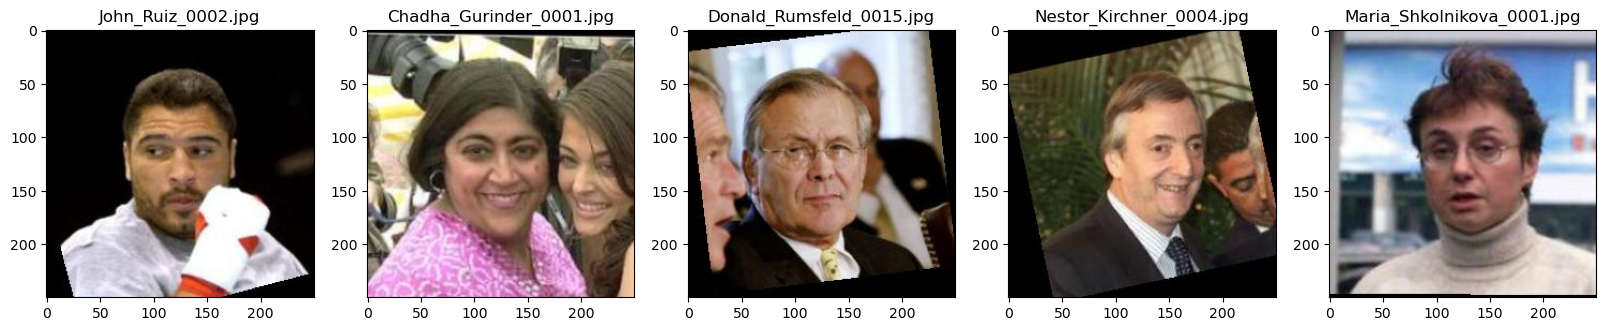

In [5]:
#Randomly display 5 images from the dataset
plt.figure(figsize=(20, 10))
num_images = 5
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    index = np.random.choice(range(len(images_uncrop)))
    image = images_uncrop[index]
    filename=filenames_uncrop[index]
    plt.imshow(image, 'gray')
    plt.title(filename)

Original LFW dataset we see above, where face matching accuracy can be unrealistically boosted through the use of background parts of images (i.e. by using possible correlations between faces and backgrounds).

Hence we are using LFWcrop Face Dataset -- cropped gray version of the Labeled Faces in the Wild (LFW) dataset, keeping only the center portion of each image (i.e. the face) where background is omitted. 

# LFWCrop Dataset: https://conradsanderson.id.au/lfwcrop/

In [6]:
filenames = []
images = []

for filename in os.listdir('C:/Users/mvipi/Desktop/Multivariate Project/Labelled_Faces_Wild/lfwcrop_grey/lfwcrop_grey/faces'):
    filenames.append(filename.split('_')[0])
    image = np.array(Image.open(os.path.join('C:/Users/mvipi/Desktop/Multivariate Project/Labelled_Faces_Wild/lfwcrop_grey/lfwcrop_grey/faces', filename)))
    images.append(image)

images = np.array(images)

print('Total Number of Faces: {}'.format(len(images)))
print(images.shape)

X = images.reshape(13233, 64*64)
print(X.shape)

Total Number of Faces: 13233
(13233, 64, 64)
(13233, 4096)


In [7]:
filenames

['Aaron',
 'Aaron',
 'Aaron',
 'Aaron',
 'Aaron',
 'Aaron',
 'Aaron',
 'Aaron',
 'Aaron',
 'Aaron',
 'Aaron',
 'Abbas',
 'Abba',
 'Abdel',
 'Abdel',
 'Abdel',
 'Abdel',
 'Abdoulaye',
 'Abdoulaye',
 'Abdoulaye',
 'Abdoulaye',
 'Abdulaziz',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullah',
 'Abdullatif',
 'Abdullatif',
 'Abdul',
 'Abdul',
 'Abel',
 'Abel',
 'Abel',
 'Abel',
 'Abel',
 'Abid',
 'Abid',
 'Abid',
 'Abner',
 'Abraham',
 'Aby',
 'Adam',
 'Adam',
 'Adam',
 'Adam',
 'Adam',
 'Adam',
 'Adam',
 'Adam',
 'Adam',
 'Adam',
 'Adam',
 'Adam',
 'Adelina',
 'Adel',
 'Adel',
 'Adel',
 'Adisai',
 'Adolfo',
 'Adolfo',
 'Adolfo',
 'Adolfo',
 'Adolfo',
 'Adoor',
 'Adriana',
 'Adriana'

In [8]:
len(filenames) #Total images in the dataset

13233

In [9]:
image  #pixel intensities [0-255]

array([[176, 179, 180, ...,  17,  13,  10],
       [169, 174, 176, ...,  17,  16,  10],
       [162, 166, 172, ...,  15,  17,  10],
       ...,
       [189, 182, 157, ...,  23,  25,  25],
       [185, 183, 165, ...,  21,  24,  25],
       [182, 176, 162, ...,  21,  21,  22]], dtype=uint8)

In [10]:
X[0] #All pixels in an image is transferred as a row, hence each row is a representation of an image

array([133, 155, 164, ...,  63,  62,  65], dtype=uint8)

In [11]:
X.T.shape, X.shape #shape of transpose and its original dataset

((4096, 13233), (13233, 4096))

In [12]:
type(X)

numpy.ndarray

In [13]:
type(filenames)

list

# Visualize the Dataset

You can see that each image has a complete face, and the facial features like eyes, nose, and lips are clearly visible in each image.

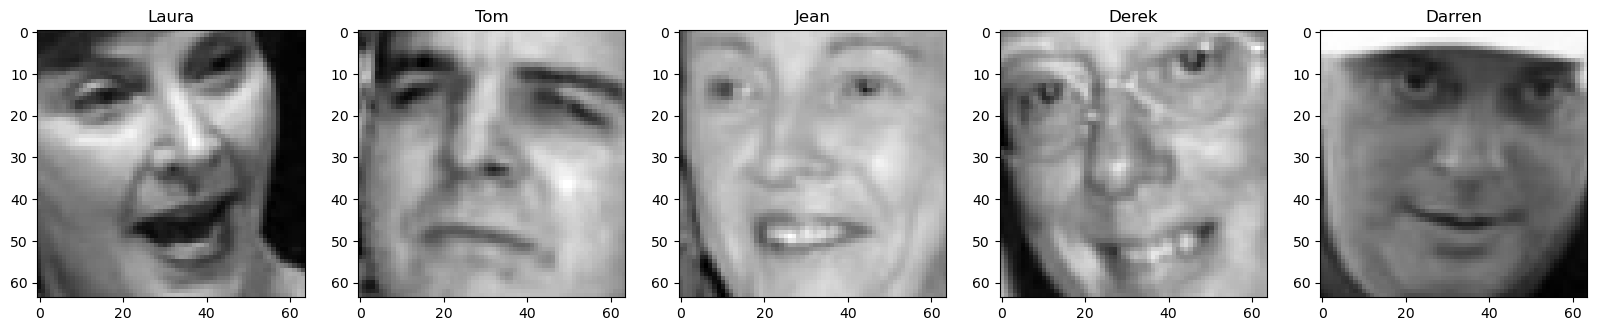

In [14]:
plt.figure(figsize=(20, 10))
num_images = 5
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    index = np.random.choice(range(len(images)))
    image = images[index]
    filename=filenames[index]
    plt.imshow(image, 'gray')
    plt.title(filename)

## Find the Eigenvectors and Eigenvalues of Covariance Matrix

In [15]:
#Takes time
# Compute the covariance matrix 
covariance_matrix = np.cov(X.T)

# The column of the eigenvector matrix are the eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [16]:
covariance_matrix.shape  ##p should have rows and columns equal to no of columns

(4096, 4096)

In [17]:
eigenvalues.shape

(4096,)

In [18]:
eigenvectors.shape  ##Loadings Matrix (p)

(4096, 4096)

In [19]:
# Create  (eigenvalue, eigenvector) tuple
# eigenvectors[:,i] implies we are selecting a column, not row
eigen_pair = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]

# Sort the pairs according to decreasing eigenvalues
eigen_pair.sort(key=lambda x: x[0], reverse=True)

In [69]:
#Total Variance
T_var = sum(eigenvalues)
T_var

6966526.762434348

R2 Score - Statistical measure (coefficient of determination) used to measure the proportion of total variance that is captured by the principal components

In [70]:
#R2 value for each of components in PCA
R2_dict = {}
j=0
R2_individual = [eigenvalue/T_var for eigenvalue in eigenvalues]
for i in R2_individual:
    j+=1
    R2_dict["PC"+ str(j)]=i

In [71]:
R2_dict  ##R2_score

{'PC1': 0.2966320439259988,
 'PC2': 0.1327236230115441,
 'PC3': 0.0644965926315271,
 'PC4': 0.03854665167277182,
 'PC5': 0.034199874697943645,
 'PC6': 0.02161878389658691,
 'PC7': 0.01972108105729267,
 'PC8': 0.017624725722934408,
 'PC9': 0.015508691101660805,
 'PC10': 0.01464925969002695,
 'PC11': 0.01234904902030328,
 'PC12': 0.012053519210179069,
 'PC13': 0.011134983118537509,
 'PC14': 0.008541040644517859,
 'PC15': 0.007813073779346385,
 'PC16': 0.007633469327774614,
 'PC17': 0.007298498316850899,
 'PC18': 0.006803816912986882,
 'PC19': 0.006536229611271202,
 'PC20': 0.005958226786986219,
 'PC21': 0.0056051060966304835,
 'PC22': 0.005313262637062604,
 'PC23': 0.00509286389415617,
 'PC24': 0.005029264803475657,
 'PC25': 0.0049042734599017215,
 'PC26': 0.004664139237048923,
 'PC27': 0.0044882754045438,
 'PC28': 0.004326231596947872,
 'PC29': 0.004164410760147253,
 'PC30': 0.004045817546696776,
 'PC31': 0.0038373384647592485,
 'PC32': 0.003821116434664891,
 'PC33': 0.00366082207944416

In [20]:
eigen_pair

[(2066495.0726060716,
  array([-0.0097989 , -0.01036021, -0.01082037, ..., -0.00702491,
         -0.00633099, -0.00566395])),
 (924622.6717171693,
  array([ 0.02190924,  0.02245692,  0.02266664, ..., -0.02088888,
         -0.01988503, -0.01886505])),
 (449317.2386533595,
  array([0.02268897, 0.02137736, 0.0196002 , ..., 0.03738967, 0.03771434,
         0.03786593])),
 (268536.2804805996,
  array([-0.03100978, -0.03380784, -0.03637315, ...,  0.00056672,
          0.00047791,  0.00036658])),
 (238254.34235512576,
  array([-0.00053359, -0.00175715, -0.00329532, ..., -0.04109763,
         -0.039944  , -0.03830374])),
 (150607.83658685745,
  array([-0.01651199, -0.01562756, -0.01453013, ...,  0.02116718,
          0.02078609,  0.01956824])),
 (137387.43896976646,
  array([-0.0184816 , -0.01822605, -0.0171898 , ..., -0.01970438,
         -0.0201591 , -0.01990172])),
 (122783.12342938762,
  array([-0.02933268, -0.03040728, -0.03014252, ...,  0.02420037,
          0.02432479,  0.02402877])),
 

In [72]:
cumulative_R2 = np.cumsum(R2_individual)
cumulative_R2

array([0.29663204, 0.42935567, 0.49385226, ..., 0.99999996, 0.99999998,
       1.        ])

In [21]:
# Percentage of variance to keep
keep_variance=0.99

required_variance = keep_variance * sum(eigenvalues)

required_dim = 0
variance = 0
for i in range(len(eigen_pair)):
    variance += eigen_pair[i][0]
    if variance >= required_variance:
        required_dim = i + 1
        break

print('Total Dimensions: {}'.format(len(eigen_pair)))
print('Required Dimensions/Total Number of Principal Components Required: {}'.format(required_dim))

Total Dimensions: 4096
Required Dimensions/Total Number of Principal Components Required: 577


# Generating p (projection/Principal component) matrix

In [22]:
#Here each principal component (i.e eigen vectors will be stored as columns in p matrix)
p_matrix = np.empty(shape=(X.shape[1], required_dim))
p_matrix.shape

(4096, 577)

In [23]:
#Storing the eigen vectors as columns in p_matrix
for i in range(required_dim):
    eig_vector = eigen_pair[i][1]
    p_matrix[:, i] = eig_vector
print("Shape of Projection (p) matrix {}".format(p_matrix.shape))
p_matrix   

Shape of Projection (p) matrix (4096, 577)


array([[-0.0097989 ,  0.02190924,  0.02268897, ..., -0.01812298,
        -0.00019167, -0.0163779 ],
       [-0.01036021,  0.02245692,  0.02137736, ...,  0.01383692,
        -0.00886282,  0.02967026],
       [-0.01082037,  0.02266664,  0.0196002 , ...,  0.02907685,
        -0.00608883,  0.04295876],
       ...,
       [-0.00702491, -0.02088888,  0.03738967, ...,  0.00161962,
         0.04494956,  0.00964836],
       [-0.00633099, -0.01988503,  0.03771434, ...,  0.02780114,
         0.03473788, -0.00211052],
       [-0.00566395, -0.01886505,  0.03786593, ...,  0.05068526,
        -0.01128422, -0.02356983]])

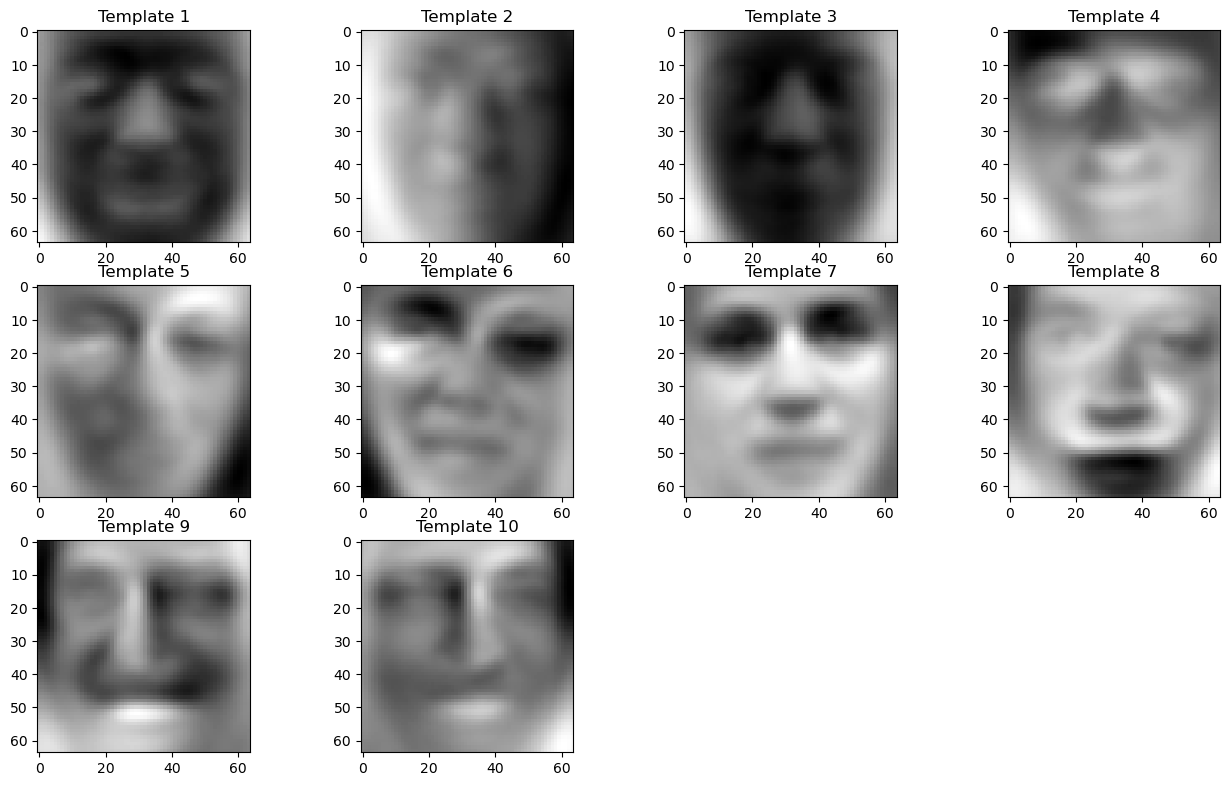

In [24]:
#Visualize random 10/577 each eigen face/p-component
p_visualize = p_matrix.reshape(64, 64, required_dim)
p_visualize.shape

plt.figure(figsize=(16,16))
for image in range(10):
    plt.subplot(5,4, image+1)
    plt.imshow(p_visualize[:,:,image], cmap='gray')
    plt.title('Template {}'.format(image+1))

# Score Matrix t by --> data X onto matrix p

In [25]:
X.shape, p_matrix.shape
t_scores = X.dot(p_matrix)
print("Dimensions of score matrix: {}".format(t_scores.shape))
t_scores

Dimensions of score matrix: (13233, 577)


array([[-8.55457730e+03,  2.11039381e+03,  3.46009771e+02, ...,
        -3.43405014e+00, -5.08077638e+00,  3.31610187e+00],
       [-6.83552133e+03, -1.56674582e+03,  1.51132989e+03, ...,
         7.77731410e+00, -1.17500220e+01,  1.41392080e+00],
       [-8.48348096e+03, -3.86139912e+02,  1.49774890e+02, ...,
         1.75660983e+01,  4.11710207e+00,  2.21344831e+00],
       ...,
       [-5.70835280e+03,  1.45776639e+02, -2.08476943e+02, ...,
         2.69387474e+01,  2.19102371e+01,  1.33469125e+01],
       [-9.72651404e+03, -7.36362352e+02,  5.26912096e+02, ...,
        -3.88576904e+00, -2.17751659e+00,  1.49756044e+01],
       [-7.80966507e+03,  4.86586667e+02,  1.08899130e+03, ...,
         3.75742201e+00, -7.25160352e-01,  1.39682488e+01]])

# Reconstructed Image

In [26]:
#Selecting any random row from score matrix t
index = np.random.randint(0,13233)
index

292

In [27]:
#Random score row
projected_image= np.expand_dims(t_scores[index], 0)
projected_image.shape

(1, 577)

In [28]:
# Dot product btw chosen score and p matrix to get the original image
image_reconstructed = projected_image.dot(p_matrix.T)
print(image_reconstructed.shape)
image_reconstructed = image_reconstructed.reshape(64, 64)
print(image_reconstructed.shape)

(1, 4096)
(64, 64)


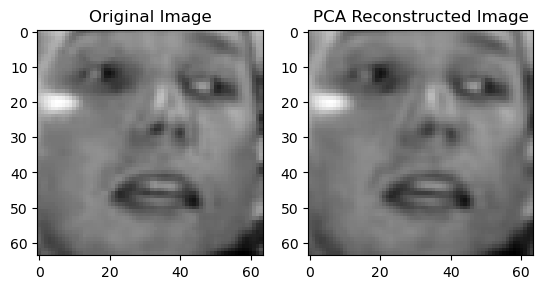

In [29]:
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(images[index], 'gray')

plt.subplot(1, 2, 2)
plt.title('PCA Reconstructed Image')
plt.imshow(image_reconstructed, 'gray')

# Compression Ratio Calculation

In [30]:
# There are 13233 images in dataset, each having 64x64 dimensional
# Therefore unique values to store the dataset
X_unique_store = X.shape[0]*X.shape[1]
X_unique_store
#54.202368 MB

54202368

In [31]:
# After PCA for storing the score matrix
T_unique_store = t_scores.shape[0]*t_scores.shape[1]
T_unique_store

7635441

In [32]:
# After PCA for storing the p matrix
P_unique_store = p_matrix.shape[0]*p_matrix.shape[1]
P_unique_store

2363392

In [33]:
# Total storage after PCA
Total_PCA_storage = T_unique_store + P_unique_store
Total_PCA_storage
#9.998833 MB

9998833

In [34]:
# Percentage Compression
compression_percentage = (1 - Total_PCA_storage/X_unique_store) * 100
print(f"Compression Percentage: {compression_percentage:.3f}%")

Compression Percentage: 81.553%


#############################################################################################################################

# Face Recognition using Support Vector Machine and PCA Approach

# 1. Recognition without using PCA (Using sklearn for PCA)

In [35]:
#Importing Libraries
import numpy as np 
import matplotlib.pyplot as plt 
from time import time


# Import scikit-learn library 
from sklearn.datasets import fetch_lfw_people 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 

In [36]:
lfw_people = fetch_lfw_people(min_faces_per_person = 50, resize = 0.4) 

In [37]:
lfw_people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [38]:
lfw_people.target

array([3, 1, 3, ..., 7, 3, 5], dtype=int64)

In [39]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape 
n_samples, h, w

(1329, 50, 37)

In [40]:
# Get samples X(No of images) and targets(y) columns equivalents to number of pixels
X = lfw_people.data 
y = lfw_people.target 
target_names = lfw_people.target_names

In [41]:
X ##Scaled in range [0-1]

array([[0.25751635, 0.34117648, 0.3895425 , ..., 0.54509807, 0.1124183 ,
        0.06797386],
       [0.28104576, 0.2771242 , 0.28366014, ..., 0.74509805, 0.7607843 ,
        0.7843137 ],
       [0.32287583, 0.26797387, 0.30980393, ..., 0.5424837 , 0.58562094,
        0.5738562 ],
       ...,
       [0.31764707, 0.35555556, 0.45228758, ..., 0.42222223, 0.5921569 ,
        0.49019608],
       [0.19346406, 0.24705882, 0.34248367, ..., 0.7372549 , 0.6653595 ,
        0.6117647 ],
       [0.21437909, 0.13464053, 0.18562092, ..., 0.669281  , 0.7281046 ,
        0.83529407]], dtype=float32)

In [42]:
y

array([3, 1, 3, ..., 7, 3, 5], dtype=int64)

In [63]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Junichiro Koizumi', 'Serena Williams',
       'Tony Blair'], dtype='<U17')

In [43]:
print("unique target number:",np.unique(y))

unique target number: [0 1 2 3 4 5 6 7]


In [44]:
print("X dimension: ",X.shape)
print("Y dimension: ",y.shape)

X dimension:  (1329, 1850)
Y dimension:  (1329,)


In [45]:
#No of Different People present in the dataset
n_classes = len(target_names)
len(target_names)

8

In [66]:
for i in range(8): 
   print(f'Class {i} has {(y == i).sum()} samples.')

Class 0 has 77 samples.
Class 1 has 236 samples.
Class 2 has 121 samples.
Class 3 has 530 samples.
Class 4 has 109 samples.
Class 5 has 60 samples.
Class 6 has 52 samples.
Class 7 has 144 samples.


This person George W Bush has most number of samples in our dataset


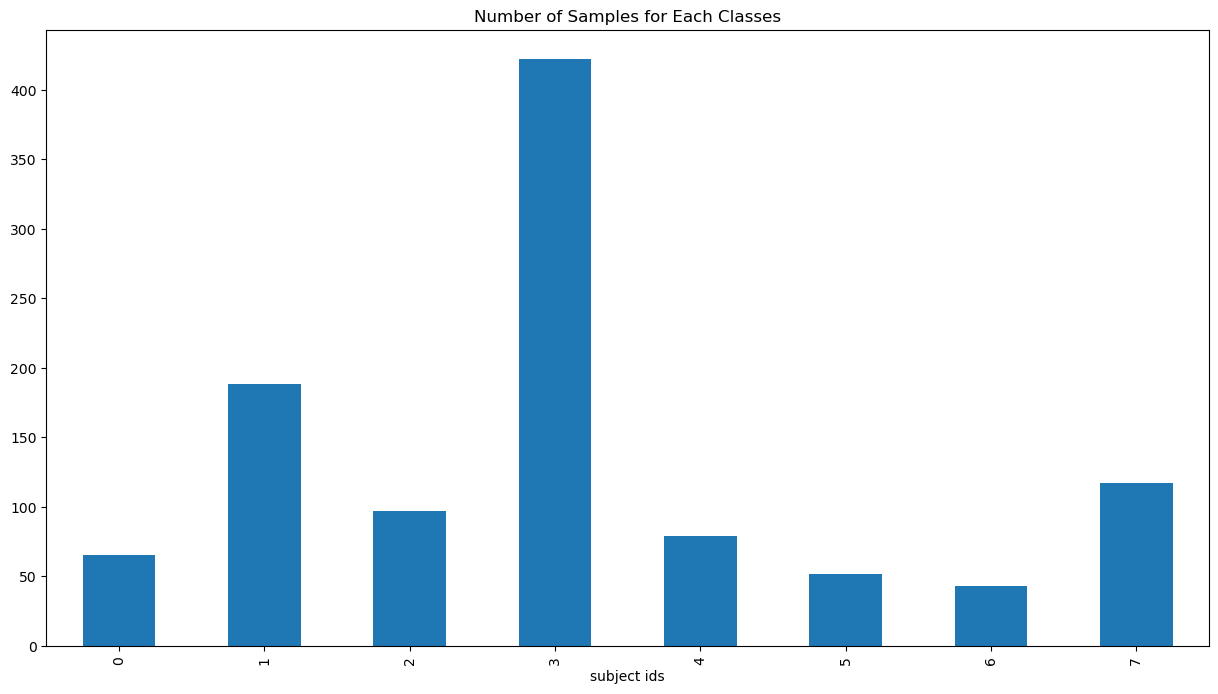

In [67]:
import pandas as pd
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")
print("This person "+ target_names[3] + " has most number of samples in our dataset")

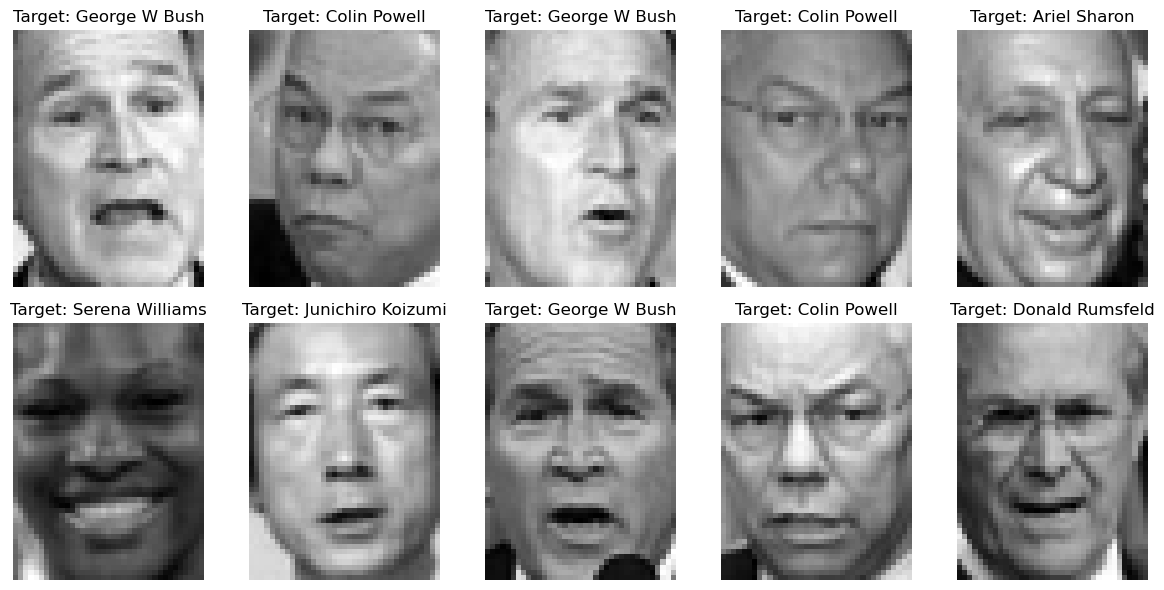

In [46]:
# Number of images to plot
num_images_to_plot = 10

# Plot the images
plt.figure(figsize=(12, 6))
for i in range(num_images_to_plot):
    plt.subplot(2, num_images_to_plot // 2, i + 1)
    plt.imshow(X[i].reshape((lfw_people.images.shape[1], -1)), cmap='gray')
    plt.title(f'Target: {lfw_people.target_names[y[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.2, random_state = 42) 
print("size of training Data is % d and Testing Data is % d" %( 
        y_train.shape[0], y_test.shape[0])) 

size of training Data is  1063 and Testing Data is  266


In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1063, 1850), (266, 1850), (1063,), (266,))

In [68]:
print("Fitting the classifier to the training set") 
t0 = time() 
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], } 
clf = GridSearchCV( 
    SVC(kernel ='rbf', class_weight ='balanced'), param_grid, n_jobs=-1, cv=5 
) 
clf = clf.fit(X_train, y_train) 
print("done in % 0.3fs" % (time() - t0)) 
print("Best estimator found by grid search:") 
print(clf.best_estimator_) 
  
print("Predicting people's names on the test set") 
t0 = time() 
y_pred = clf.predict(X_test) 
print("done in % 0.3fs" % (time() - t0)) 
# print classifiction results 
print(classification_report(y_test, y_pred, target_names = target_names)) 
# print confusion matrix 
print("Confusion Matrix is:") 
print(confusion_matrix(y_test, y_pred, labels = range(n_classes))) 

Fitting the classifier to the training set
done in  68.311s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.0001)
Predicting people's names on the test set
done in  0.297s
                   precision    recall  f1-score   support

     Ariel Sharon       0.90      0.75      0.82        12
     Colin Powell       0.81      0.92      0.86        48
  Donald Rumsfeld       0.63      0.79      0.70        24
    George W Bush       0.92      0.82      0.87       108
Gerhard Schroeder       0.86      0.80      0.83        30
Junichiro Koizumi       0.73      1.00      0.84         8
  Serena Williams       0.88      0.78      0.82         9
       Tony Blair       0.75      0.78      0.76        27

         accuracy                           0.83       266
        macro avg       0.81      0.83      0.81       266
     weighted avg       0.84      0.83      0.83       266

Confusion Matrix is:
[[ 9  0  2  0  1  0  0  0]
 [ 0 44  1  2  0  0  0  1]
 [ 0  

# 2. Repeating the Recognition after applying PCA

In [51]:
X.shape

(1329, 1850)

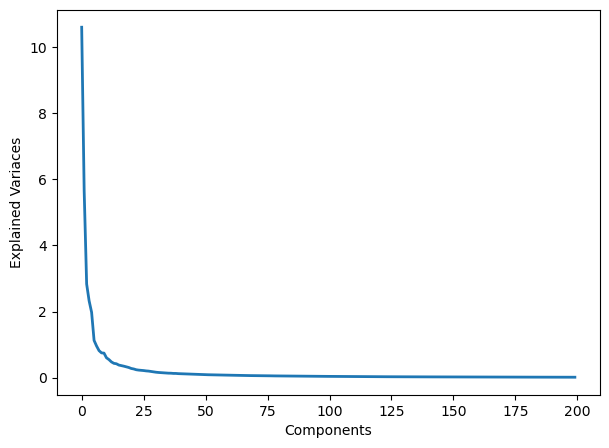

In [52]:
pca=PCA(n_components = 200)
pca.fit(X)

plt.figure(1, figsize=(7,5))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In the figure above, it can be seen that 75 and more PCA components represent the same data. Now let's make the classification process using 80 PCA components.

In [53]:
n_components = 80
  
t0 = time() 
pca = PCA(n_components = n_components, svd_solver ='randomized', whiten = True)
pca.fit(X) 
print("done in % 0.3fs" % (time() - t0)) 

done in  0.106s


In [54]:
print(f'Number of Principal Components: {pca.components_.shape[0]}')
print(f'Dimension of p: {pca.components_.shape}')
pca.components_  ## these are 150 eigen vectors/principal components

Number of Principal Components: 80
Dimension of p: (80, 1850)


array([[-0.0065944 , -0.00866615, -0.01175594, ..., -0.01700216,
        -0.01521001, -0.01285249],
       [ 0.01941439,  0.01854455,  0.02098673, ..., -0.04663785,
        -0.04482198, -0.04297966],
       [ 0.02992669,  0.02814417,  0.02677977, ...,  0.04886926,
         0.04227779,  0.03748836],
       ...,
       [ 0.00825007, -0.00629874, -0.00336495, ..., -0.02460116,
        -0.04220669, -0.02303061],
       [ 0.03020773,  0.0197845 ,  0.01138226, ...,  0.04646694,
         0.04450802,  0.04328446],
       [-0.03649589, -0.0235278 , -0.00489428, ..., -0.00588183,
         0.00838424, -0.0242124 ]], dtype=float32)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [55]:
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test) 
X_train_pca.shape, X_test_pca.shape

((1063, 80), (266, 80))

Text(0, 0.5, 'Second Principal Component')

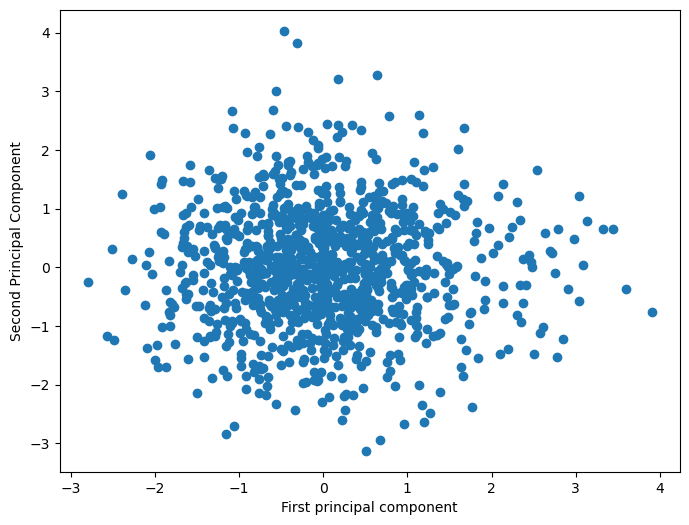

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [57]:
pca.explained_variance_ratio_

array([0.24631341, 0.13135526, 0.06577561, 0.05394334, 0.04592003,
       0.02613539, 0.02221333, 0.01895697, 0.01736829, 0.01719838,
       0.0139086 , 0.01265481, 0.01100555, 0.01000696, 0.00970871,
       0.0087998 , 0.0084353 , 0.00801822, 0.00752932, 0.00708933,
       0.00640093, 0.00605714, 0.0055125 , 0.00525328, 0.00511754,
       0.00493353, 0.00469624, 0.00455198, 0.00427656, 0.00407907,
       0.003762  , 0.0035892 , 0.00349998, 0.00334485, 0.00321771,
       0.00310491, 0.00307059, 0.00292227, 0.00291611, 0.00276642,
       0.00269802, 0.00266225, 0.00252804, 0.00246057, 0.00238391,
       0.00232711, 0.00230545, 0.00224194, 0.00219057, 0.00211222,
       0.00206701, 0.00199283, 0.00196638, 0.00193212, 0.00186175,
       0.00184776, 0.00179989, 0.00177238, 0.00174047, 0.00169958,
       0.00164554, 0.00161278, 0.00158914, 0.00156393, 0.00151654,
       0.00149421, 0.00144178, 0.0014282 , 0.00139589, 0.00137861,
       0.0013565 , 0.00132569, 0.00128538, 0.00127792, 0.00124

In [58]:
np.sum(pca.explained_variance_ratio_)

0.89550155

In [59]:
print("Sample Data point after applying PCA\n", X_train_pca[0])
#This is a scores for the first image reduced to 80 dim

Sample Data point after applying PCA
 [-0.3973375  -0.81632644  0.6481409  -0.66882366  0.90160656 -1.7756457
 -0.8897952  -2.0864422  -0.4981184   0.22840764  0.95802873  0.08056806
  0.2838187  -2.4685752  -0.9049505   1.9906079  -0.9210762  -1.4966054
  0.5850158  -0.8702343  -0.30955657  0.0444904   1.2931871   0.36605522
  0.04582444  1.6801214  -0.08049697  0.09687798  0.53811336 -1.8253745
 -0.27731362  0.21742515  1.5107352   1.1910131   0.56922626  1.6431878
  0.2699107  -0.9075961  -0.34921288  0.25065738  1.3137124  -0.8454022
  0.63739437  0.40795097  0.53391105  1.486034    0.53999996  0.98643714
  0.0761385   0.50466174 -1.7701186   0.43491292 -1.1620293  -0.9534532
 -0.18689524 -0.9121519  -0.0091441  -0.78908175  1.561354   -0.2684135
  0.37624213  1.5890259   0.3859815   1.4552231  -0.11198062 -0.42081475
 -2.134925    1.7168918   0.04623995  0.01196001  0.22785194 -2.7121897
 -0.08702835  0.61723226 -0.11278055  0.44264105 -1.4750205  -1.4154747
  0.5493343   0.056773

In [60]:
print("Fitting the classifier to the PCA reduced training set") 
t0 = time() 
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], } 
clf = GridSearchCV( 
    SVC(kernel ='rbf', class_weight ='balanced'), param_grid 
) 
clf = clf.fit(X_train_pca, y_train) 
print("done in % 0.3fs" % (time() - t0)) 
print("Best estimator found by grid search:") 
print(clf.best_estimator_) 
  
print("Predicting people's names on the test set") 
t0 = time() 
y_pred = clf.predict(X_test_pca) 
print("done in % 0.3fs" % (time() - t0)) 
# print classifiction results 
print(classification_report(y_test, y_pred, target_names = target_names)) 
# print confusion matrix 
print("Confusion Matrix is:") 
print(confusion_matrix(y_test, y_pred, labels = range(n_classes))) 

Fitting the classifier to the PCA reduced training set
done in  17.157s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.01)
Predicting people's names on the test set
done in  0.050s
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.58      0.74        12
     Colin Powell       0.82      0.94      0.87        48
  Donald Rumsfeld       0.86      0.79      0.83        24
    George W Bush       0.86      0.94      0.90       108
Gerhard Schroeder       0.92      0.77      0.84        30
Junichiro Koizumi       1.00      0.88      0.93         8
  Serena Williams       1.00      0.67      0.80         9
       Tony Blair       0.81      0.78      0.79        27

         accuracy                           0.86       266
        macro avg       0.91      0.79      0.84       266
     weighted avg       0.87      0.86      0.86       266

Confusion Matrix is:
[[  7   2   1   2   0   0   0   0]
 [  0  45   0  

<AxesSubplot:>

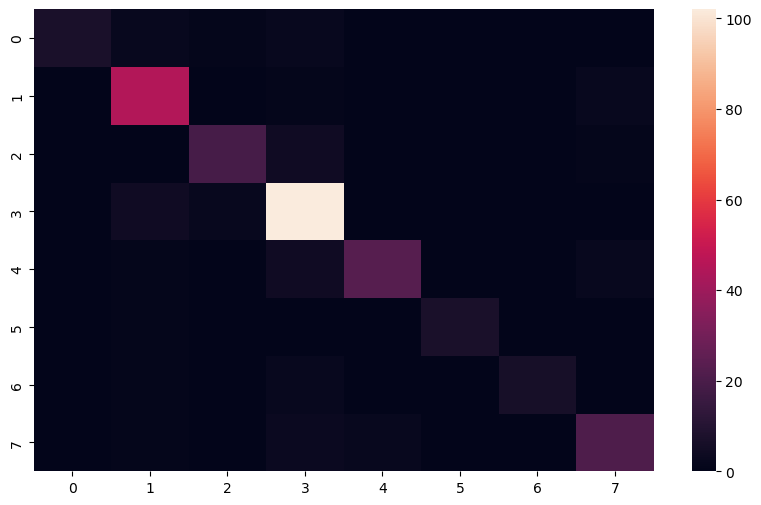

In [61]:
#Heatmap of Confusion Metrics
import seaborn as sns
plt.figure(1, figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred))

############################################################################################################################

# Future Scope

In [73]:
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models=[]
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("GaussianNB",GaussianNB()))
models.append(("KNeighbors Classifier",KNeighborsClassifier(n_neighbors=5)))
models.append(("Decision Tree Classifier",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=", "{} Result".format(name), 10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== Linear Discriminant Analysis Result ==========
Accuracy score:0.82

========== Logistic Regression Result ==========
Accuracy score:0.76

========== GaussianNB Result ==========
Accuracy score:0.71

========== KNeighbors Classifier Result ==========
Accuracy score:0.72

========== Decision Tree Classifier Result ==========
Accuracy score:0.46

========== SVM Result ==========
Accuracy score:0.83



In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)

for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, y, cv=kfold)
    print("cross validations score for all 5 splits", cv_scores)
    print("{} mean cross validations score:{:.2f}\n".format(name, cv_scores.mean()))

cross validations score for all 5 splits [0.81203008 0.83458647 0.85338346 0.84586466 0.86037736]
Linear Discriminant Analysis mean cross validations score:0.84

cross validations score for all 5 splits [0.77443609 0.82706767 0.78947368 0.77067669 0.81509434]
Logistic Regression mean cross validations score:0.80

cross validations score for all 5 splits [0.73684211 0.81578947 0.78947368 0.71804511 0.79245283]
GaussianNB mean cross validations score:0.77

cross validations score for all 5 splits [0.67669173 0.69924812 0.67293233 0.62030075 0.70188679]
KNeighbors Classifier mean cross validations score:0.67

cross validations score for all 5 splits [0.41729323 0.46992481 0.4887218  0.40225564 0.45660377]
Decision Tree Classifier mean cross validations score:0.45

cross validations score for all 5 splits [0.78571429 0.82706767 0.87218045 0.76691729 0.83773585]
SVM mean cross validations score:0.82

